# Basic Mechanisms that Satisfy Differential Privacy Definition

Adding random noise to a query's output is the simplest way to achieve differential privacy. The main difficulty is to add just the right amount of noise to satisfy the differential privacy definition without making the output too noisy to be of any use. Some fundamental mechanisms that specify precisely what kind of noise to use and how much to use have been developed in the area of differential privacy to facilitate this process.

Two commonly used **mechanisms** we will be covering in this notebook are: 
- **Laplacian mechanism** that satisfies the pure differential privacy 
- **Gaussian mechanism** that satisfies the approximate differential privacy

### Contents 

1. [Laplacian mechanism](#cell1)
    * 1.1. [Visualising laplacian distribution ](#cell11)
    * 1.2. [Visualising the impact of epsilon on noise scale](#cell12)
    * 1.3. [Visualising the impact of sensitivity on noise scale](#cell13)
2. [Gaussian mechanism](#cell2)
    * 2.1. [Visualising gaussian distribution ](#cell21)
    * 2.2. [Visualising the impact of epsilon on noise scale](#cell22)
    * 2.3. [Visualising the impact of delta on noise scale](#cell23)
    * 2.4. [Visualising the impact of sensitivity on noise scale](#cell24) 

### Imports 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# constants for visualising graphs
colors = ["#4CB7A5", "#0198E1", "#DE3163"]

## 1. Laplacian mechanism <a id="cell1"></a>

For a function ${f}(x)$ that output's a number for a query, **laplace mechanism** $M(x)$ is given as: 

$M(x)= {f}(x) + Lap(\frac{s}{\epsilon}$)

where **$s$** denotes sensitivtity and **$Lap(S)$** denotes sampling a random value from the [laplacian distribution](https://en.wikipedia.org/wiki/Laplace_distribution) with center 0 and scale **$S$** = $\frac{sensitivity}{epsilon}$.

You can notice that the noise scale is directly proportional to sensitivity ($s$) and inversely proportional to epsilon ($\epsilon$).

The laplacian mechanism satisfies the **$\epsilon$-differential privacy** i.e. pure-differential privacy, meaning, it provides worst case privacy gaurantee to the individuals in the dataset. 

In [3]:
def laplace_mechanism(query, sensitivity, epsilon):
    return query + np.random.laplace(loc=0, scale=sensitivity/epsilon)

### 1.1. Visualising laplacian distribution <a id="cell11"></a>

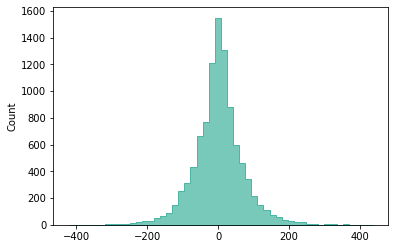

In [4]:
sensitivity = 100
epsilon = 2
sns.histplot([laplace_mechanism(0, sensitivity, epsilon) for i in range(10000)], bins=50, element="step", color=colors[0]);

### 1.2. Visualising the impact of epsilon on noise scale <a id="cell12"></a>

Keeping the sensitivity fixed, we can visualise that the noise scales with smaller values of epsilon. 

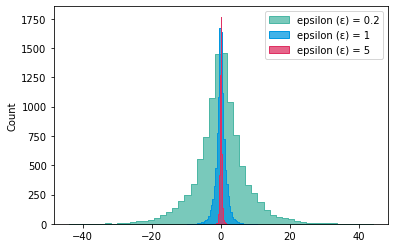

In [5]:
# keeping sensitivity fixed
sensitivity = 1

# epsilon values
epsilons = [0.2, 1, 5]

for idx, epsilon in enumerate(epsilons):
    # ploting laplacian distribution
    sns.histplot([laplace_mechanism(0, sensitivity, epsilon) for i in range(10000)],
                 bins=50, element="step", color=colors[idx], label=f"epsilon (ε) = {epsilon}");
plt.legend();

### 1.3. Visualising the impact of sensitivity on noise scale <a id="cell13"></a>

Keeping the epsilon fixed, we can visualise that the noise scales with increasing sensitivity. 

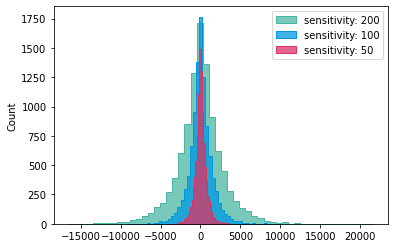

In [6]:
# keeping epsilon fixed
epsilon = 0.1

# sensitivity values
sensitivities = [200, 100, 50]

for idx, sensitivity in enumerate(sensitivities):
    # ploting laplacian distribution
    sns.histplot([laplace_mechanism(0, sensitivity, epsilon) for i in range(10000)],
                 bins=50, element="step", color=colors[idx], label=f"sensitivity: {sensitivity}");
plt.legend();

## 2. Gaussian mechanism <a id="cell2"></a>

For a function ${f}(x)$ that output's a number for a query, **gaussian mechanism** $M(x)$ is given as: 

$M(x)= {f}(x) + \mathcal{N}(\sigma^{2})$

where $\sigma^{2} = \frac{2s^2 \log(1.25/\delta)}{\epsilon^2}$

$\mathcal{N}(\sigma^{2})$ denotes sampling a random value from the [gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) with center 0 and scale **$\sigma^{2}$**. 

$s$ is sensitivity  

𝛿 is the failue probability 
- With probability 1−𝛿, we will get the same guarantee as pure differential privacy;
- with probability 𝛿, we get no guarantee 

You can notice that the noise scale is directly proportional to sensitivity ($s$) and inversely proportional to epsilon ($\epsilon$) and delta ($\delta$).

The gaussian mechanism satisfies the **$(\epsilon, \delta)$-differential privacy** i.e. approximate-differential privacy, meaning, it provides relaxed privacy gaurantee.  


In [7]:
def gaussian_mechanism(query, sensitivity, epsilon, delta):
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * sensitivity / epsilon
    return query + np.random.normal(loc=0, scale=sigma)

### 2.1. Visualising the gaussian distribution <a id="cell21"></a>

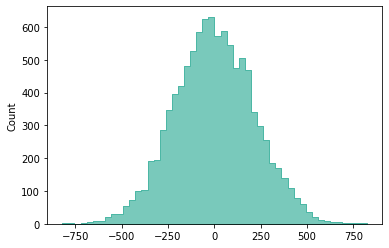

In [8]:
sensitivity = 100
epsilon = 2
delta = 10e-5
sns.histplot([gaussian_mechanism(0, sensitivity, epsilon, delta) for i in range(10000)], bins=50, element="step", color=colors[0]);

### 2.2. Visualising the impact of epsilon on noise scale <a id="cell22"></a>

Keeping sensitivity and $\delta$ fixed, we can visualise that the noise scales with smaller values of epsilon. 

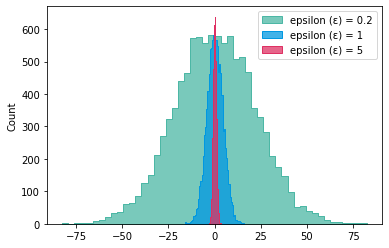

In [9]:
# keeping sensitivity fixed
sensitivity = 1

# keeping delta fixed 
delta = 10e-5

# epsilon values
epsilons = [0.2, 1, 5]

for idx, e in enumerate(epsilons):
    # ploting gaussian distribution
    sns.histplot([gaussian_mechanism(0, sensitivity, e, delta) for i in range(10000)],
                 bins=50, element="step", color=colors[idx], label=f"epsilon (ε) = {e}");
plt.legend()

### 2.3. Visualising the impact of delta on noise scale <a id="cell23"></a>

Keeping sensitivity and $\epsilon$ fixed, we can visualise that the noise scales with smaller values of delta ($\delta$). 

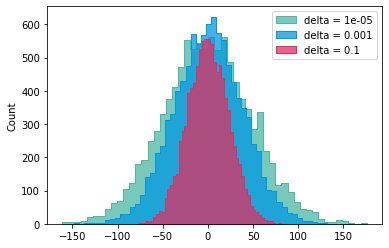

In [10]:
# keeping sensitivity fixed
sensitivity = 1

# keeping epsilon fixed 
epsilon = 0.1

# delta values
deltas = [10e-6, 10e-4, 10e-2]

for idx, d in enumerate(deltas):
    # ploting gaussian distribution
    sns.histplot([gaussian_mechanism(0, sensitivity, epsilon, d) for i in range(10000)],
                 bins=50, element="step", color=colors[idx], label=f"delta = {d}");
plt.legend()

### 2.4. Visualising the impact of sensitivity on noise scale <a id="cell24"></a>

Keeping $\delta$ and $\epsilon$ fixed, we can visualise that the noise scales with increasing sensitivity. . 

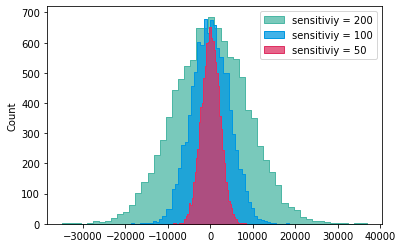

In [11]:
# keeping epsilon fixed 
epsilon = 0.1

# keeping delta fixed
delta = 10e-5

# sensitivity values
sensitivities = [200, 100, 50]

for idx, s in enumerate(sensitivities):
    # ploting gaussian distribution
    sns.histplot([gaussian_mechanism(0, s, epsilon, delta) for i in range(10000)],
                 bins=50, element="step", color=colors[idx], label=f"sensitiviy = {s}");
plt.legend()